# Cardiovascular Disease 
Predict the presence cardiovascular disease

This project aims to explore the different features that might increase or affect the chance of cardiovascular disease 
occurrence and then use the extracted knowledge to determine whether a person is at risk of cardiovascular disease or not.

To start exploring this goal, I used a logistic regression model with 10 features to determine whether a person is at risk of cardiovascular disease or not.
the following outputs is answering the question.

## 1. Data Acquisition

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [363]:
Cardio_Disease = pd.read_csv('C:/Users/Omar/Downloads/Cardio_Disease.csv')

## 2. Data Understanding & Cleansing

In [364]:
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       69996 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        69997 non-null  float64
 6   ap_lo        69999 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        69999 non-null  float64
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [365]:
Cardio_Disease.isna().sum().sum()

9

In [366]:
Cardio_Disease.shape

(70000, 13)

In [367]:
Cardio_Disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110.0,80.0,1,1,0.0,0,1,0
1,1,20228,1,156.0,85.0,140.0,90.0,3,1,0.0,0,1,1
2,2,18857,1,165.0,64.0,130.0,70.0,3,1,0.0,0,0,1
3,3,17623,2,169.0,82.0,150.0,100.0,1,1,0.0,0,1,1
4,4,17474,1,156.0,56.0,100.0,60.0,1,1,0.0,0,0,0


#### - rename some columns to understandable names 

In [368]:
Cardio_Disease.rename(columns={
    'age' : 'age_days',
    'ap_hi' : 'Systolic_blood_pressure',
    'ap_lo' : 'Diastolic_blood_pressure',
    'alco' : 'Alcohol_intake',
    'active' : 'Physical_activity',
    'cardio' : 'cardio_disease_presence',
    'gluc' : 'Glucose'
}, inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        70000 non-null  int64  
 1   age_days                  70000 non-null  int64  
 2   gender                    70000 non-null  int64  
 3   height                    69996 non-null  float64
 4   weight                    70000 non-null  float64
 5   Systolic_blood_pressure   69997 non-null  float64
 6   Diastolic_blood_pressure  69999 non-null  float64
 7   cholesterol               70000 non-null  int64  
 8   Glucose                   70000 non-null  int64  
 9   smoke                     69999 non-null  float64
 10  Alcohol_intake            70000 non-null  int64  
 11  Physical_activity         70000 non-null  int64  
 12  cardio_disease_presence   70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [369]:
Cardio_Disease.shape

(70000, 13)

In [370]:
Cardio_Disease.drop_duplicates().shape

(70000, 13)

#### - Fill the null values & drop rows with missing value

In [371]:
Cardio_Disease.height = Cardio_Disease.height.fillna(round(Cardio_Disease.height.mean()))
Cardio_Disease.Systolic_blood_pressure = Cardio_Disease.Systolic_blood_pressure.fillna(Cardio_Disease.Systolic_blood_pressure.mean())
Cardio_Disease.Diastolic_blood_pressure = Cardio_Disease.Diastolic_blood_pressure.fillna(Cardio_Disease.Diastolic_blood_pressure.mean())
Cardio_Disease.shape

(70000, 13)

In [372]:
Cardio_Disease.dropna(subset=['smoke'], inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        69999 non-null  int64  
 1   age_days                  69999 non-null  int64  
 2   gender                    69999 non-null  int64  
 3   height                    69999 non-null  float64
 4   weight                    69999 non-null  float64
 5   Systolic_blood_pressure   69999 non-null  float64
 6   Diastolic_blood_pressure  69999 non-null  float64
 7   cholesterol               69999 non-null  int64  
 8   Glucose                   69999 non-null  int64  
 9   smoke                     69999 non-null  float64
 10  Alcohol_intake            69999 non-null  int64  
 11  Physical_activity         69999 non-null  int64  
 12  cardio_disease_presence   69999 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 7.5 MB


#### - calculate the age in years 

In [373]:
def Days_to_Years(x):
    return (x/365.25)

Cardio_Disease['age_years'] = Cardio_Disease.age_days.apply(Days_to_Years)
Cardio_Disease['age_years'] = Cardio_Disease.age_years.astype('int')

In [374]:
Cardio_Disease['age_years'].value_counts()

55    4225
53    4166
57    3987
59    3844
49    3664
51    3601
54    3309
56    3307
58    3110
52    3043
50    2971
63    2937
60    2933
61    2932
47    2303
45    2214
43    2137
41    2004
62    1991
64    1986
39    1880
48    1705
40    1524
46    1499
44    1408
42    1315
29       3
30       1
Name: age_years, dtype: int64

#### - drop the id column 

In [375]:
Cardio_Disease.drop(["id"],axis=1, inplace = True)
Cardio_Disease.drop(["age_days"],axis=1, inplace = True)

In [376]:
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    69999 non-null  int64  
 1   height                    69999 non-null  float64
 2   weight                    69999 non-null  float64
 3   Systolic_blood_pressure   69999 non-null  float64
 4   Diastolic_blood_pressure  69999 non-null  float64
 5   cholesterol               69999 non-null  int64  
 6   Glucose                   69999 non-null  int64  
 7   smoke                     69999 non-null  float64
 8   Alcohol_intake            69999 non-null  int64  
 9   Physical_activity         69999 non-null  int64  
 10  cardio_disease_presence   69999 non-null  int64  
 11  age_years                 69999 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 6.7 MB


In [377]:
Cardio_Disease.describe()

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1.349576,164.359277,74.204950,128.817075,96.630747,1.366862,1.226446,0.088130,0.053772,0.803726,0.499693,52.803140
std,0.476840,8.210033,14.394528,154.012486,188.473864,0.680251,0.572267,0.283486,0.225569,0.397181,0.500003,6.762439
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [378]:
Cardio_Disease.corr()

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years
gender,1.000000,0.499048,0.155458,0.006008,0.015255,-0.035812,-0.020477,0.338133,0.170965,0.005871,0.008120,-0.022749
height,0.499048,1.000000,0.290988,0.005485,0.006150,-0.050212,-0.018575,0.187991,0.094419,-0.006514,-0.010826,-0.081336
weight,0.155458,0.290988,1.000000,0.030701,0.043716,0.141734,0.106799,0.067803,0.067131,-0.016894,0.181626,0.053510
Systolic_blood_pressure,0.006008,0.005485,0.030701,1.000000,0.016086,0.023777,0.011840,-0.000922,0.001409,-0.000034,0.054472,0.020928
Diastolic_blood_pressure,0.015255,0.006150,0.043716,0.016086,1.000000,0.024021,0.010806,0.005186,0.010601,0.004781,0.065721,0.017553
cholesterol,-0.035812,-0.050212,0.141734,0.023777,0.024021,1.000000,0.451568,0.010359,0.035764,0.009905,0.221137,0.153985
Glucose,-0.020477,-0.018575,0.106799,0.011840,0.010806,0.451568,1.000000,-0.004751,0.011251,-0.006779,0.089289,0.098508
smoke,0.338133,0.187991,0.067803,-0.000922,0.005186,0.010359,-0.004751,1.000000,0.340093,0.025860,-0.015482,-0.047474
Alcohol_intake,0.170965,0.094419,0.067131,0.001409,0.010601,0.035764,0.011251,0.340093,1.000000,0.025478,-0.007327,-0.029670
Physical_activity,0.005871,-0.006514,-0.016894,-0.000034,0.004781,0.009905,-0.006779,0.025860,0.025478,1.000000,-0.035661,-0.009812


#### - drop the outliers

In [379]:
index1 = Cardio_Disease[Cardio_Disease['age_years'] == 30 ].index

In [380]:
index2 = Cardio_Disease[Cardio_Disease['age_years'] == 29 ].index

In [381]:
Cardio_Disease.drop(index1,inplace = True)
Cardio_Disease.drop(index2,inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69995 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    69995 non-null  int64  
 1   height                    69995 non-null  float64
 2   weight                    69995 non-null  float64
 3   Systolic_blood_pressure   69995 non-null  float64
 4   Diastolic_blood_pressure  69995 non-null  float64
 5   cholesterol               69995 non-null  int64  
 6   Glucose                   69995 non-null  int64  
 7   smoke                     69995 non-null  float64
 8   Alcohol_intake            69995 non-null  int64  
 9   Physical_activity         69995 non-null  int64  
 10  cardio_disease_presence   69995 non-null  int64  
 11  age_years                 69995 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 6.7 MB


#### - the average age for heart disease presence and no presence 

In [382]:
Cardio_Disease.groupby('cardio_disease_presence')[['age_years']].mean()

,age_years
cardio_disease_presence,
0,51.197618
1,54.413145


In [383]:
Cardio_Disease.age_years.max()

64

#### Discover the height column

<AxesSubplot:xlabel='height', ylabel='weight'>

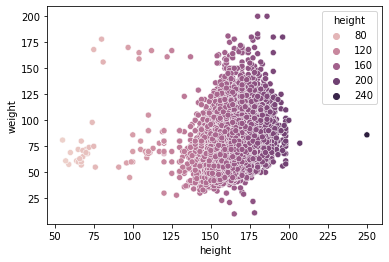

In [384]:
sns.scatterplot( data =Cardio_Disease, x = 'height',y = 'weight', hue = 'height')

The scatter plot above shows unreasonable data for the height column! there're height equal 250 and other less than 75! 
And these heights don't make sense! and I consider it as anomalies! 

In [385]:
# I decided to get rid of all the heights that less than 120 and higher than 220

Cardio_Disease.drop(Cardio_Disease[Cardio_Disease['height'] < 160].index, inplace = True)
Cardio_Disease.drop(Cardio_Disease[Cardio_Disease['height'] > 200].index, inplace = True)

#### here is the dataset after filtering & it looks pretty normal 

In [386]:
# let's clean the weight anamolies 
Cardio_Disease.drop(Cardio_Disease[Cardio_Disease['weight'] < 40].index, inplace = True)

<AxesSubplot:xlabel='height', ylabel='weight'>

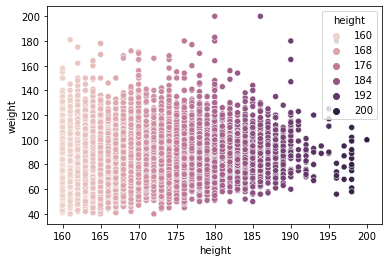

In [387]:
sns.scatterplot( data =Cardio_Disease, x = 'height',y = 'weight', hue = 'height')

#### Check whether there are imbalanced classes

- the target column is cardio_disease_presence which has 0's and 1's, let's check it!

In [388]:
Cardio_Disease['cardio_disease_presence'].value_counts()

0    25993
1    25470
Name: cardio_disease_presence, dtype: int64

- the output shows that the classes are balanced!

## 3. Data Visualization

<AxesSubplot:title={'center':'Age boxplot'}>

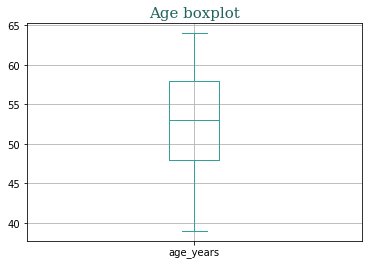

In [389]:
age_boxplot = Cardio_Disease.boxplot(column=['age_years'], color='#34A198')
plt.title("Age boxplot", family='serif',fontsize = 15, color='#21635D')
age_boxplot


(array([4157., 2714., 4001., 3078., 7657., 5340., 8069., 5077., 6595.,
        4775.]),
 array([39. , 41.5, 44. , 46.5, 49. , 51.5, 54. , 56.5, 59. , 61.5, 64. ]),
 <BarContainer object of 10 artists>)

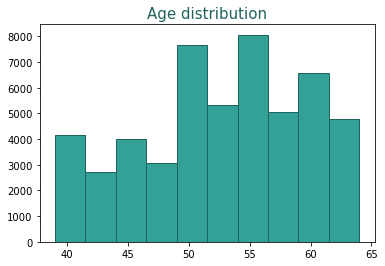

In [390]:
# 21635D
age_hist = plt.hist(Cardio_Disease['age_years'], bins = 10, color='#34A198', edgecolor = '#21635D')
plt.title('Age distribution', color = '#21635D', fontsize = 15)
age_hist

<AxesSubplot:title={'center':'Age boxplot'}>

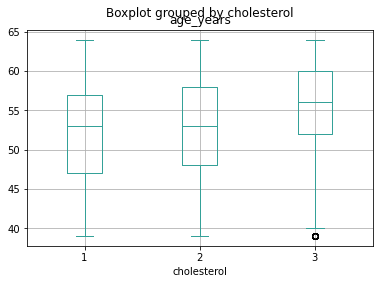

In [391]:
cholesterol_age_boxplot = Cardio_Disease.boxplot(by = 'cholesterol' , column=['age_years'], color='#34A198')
age_boxplot


<AxesSubplot:xlabel='age_years', ylabel='count'>

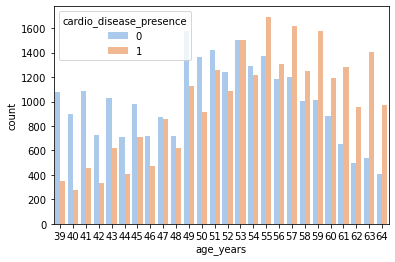

In [392]:
c = sns.color_palette("pastel")
sns.countplot(x= 'age_years' , hue = 'cardio_disease_presence' , data = Cardio_Disease, palette = c)


## 4. Feature Engineering

#### * Blood pressure reading 

In [393]:
# blood_pressure : 1 for normal , 2 for at risk , 3 for High blood pressure
def blood_pressure(s,d):
    if (s <= 120 and d <= 80):
        return 1
    elif (s > 140 and  d > 90 ):
        return 3
    else:
        return 2

In [394]:
Cardio_Disease['Blood_pressure'] = Cardio_Disease.apply(lambda x: blood_pressure(x['Systolic_blood_pressure'], x['Diastolic_blood_pressure']) , axis = 1 )

In [395]:
Cardio_Disease[Cardio_Disease.Blood_pressure == 'High blood pressure'].head(10)

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years,Blood_pressure


#### * Calculate the Body Mass index (BMI)

In [396]:
# the height should be in meters & weight in kilograms 
def BMI(W,H):
    H = H /100
    return round((W / (H*H)) , 1)

In [397]:
Cardio_Disease['BMI'] = Cardio_Disease.apply(lambda x: BMI(x['weight'], x['height']) , axis = 1 )

In [398]:
Cardio_Disease

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years,Blood_pressure,BMI
0,2,168.0,62.0,110.000000,80.0,1,1,0.0,0,1,0,50,1,22.0
2,1,165.0,64.0,130.000000,70.0,3,1,0.0,0,0,1,51,2,23.5
3,2,169.0,82.0,150.000000,100.0,1,1,0.0,0,1,1,48,3,28.7
7,2,178.0,95.0,130.000000,90.0,3,3,0.0,0,1,1,61,2,30.0
9,1,164.0,68.0,110.000000,60.0,1,1,0.0,0,0,0,54,1,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,165.0,80.0,128.817235,80.0,1,1,0.0,0,1,1,57,2,29.4
69995,2,168.0,76.0,120.000000,80.0,1,1,1.0,0,1,0,52,1,26.9
69997,2,183.0,105.0,180.000000,90.0,3,1,0.0,1,0,1,52,2,31.4
69998,1,163.0,72.0,135.000000,80.0,1,2,0.0,0,0,1,61,2,27.1


## 5. Dataset Preparation

- I'm gonna create a new dataframe & store the tables that I decided to use for model training

In [399]:
col_names = ['gender','age_years','BMI','cholesterol','Glucose','smoke','Alcohol_intake','Physical_activity','Blood_pressure','cardio_disease_presence']
#Cardio_Disease_filtered = Cardio_Disease['gender']
Cardio_Disease_filtered = pd.DataFrame(columns = col_names)
Cardio_Disease_filtered['gender'] = Cardio_Disease['gender']
Cardio_Disease_filtered['age_years'] = Cardio_Disease['age_years']
Cardio_Disease_filtered['BMI'] = Cardio_Disease['BMI']
Cardio_Disease_filtered['cholesterol'] = Cardio_Disease['cholesterol']
Cardio_Disease_filtered['Glucose'] = Cardio_Disease['Glucose']
Cardio_Disease_filtered['smoke'] = Cardio_Disease['smoke']
Cardio_Disease_filtered['Alcohol_intake'] = Cardio_Disease['Alcohol_intake']
Cardio_Disease_filtered['Physical_activity'] = Cardio_Disease['Physical_activity']
Cardio_Disease_filtered['Blood_pressure'] = Cardio_Disease['Blood_pressure']
Cardio_Disease_filtered['cardio_disease_presence'] = Cardio_Disease['cardio_disease_presence']

In [400]:
Cardio_Disease_filtered.shape

(51463, 10)

<AxesSubplot:>

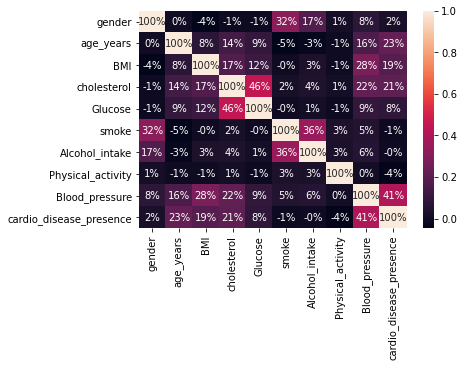

In [401]:
sns.heatmap(Cardio_Disease_filtered.corr(), annot = True, fmt = '.0%')

In [402]:
x = Cardio_Disease_filtered.drop(columns = ['cardio_disease_presence'], axis = 1)
y = Cardio_Disease_filtered['cardio_disease_presence']

In [403]:
x.head()

,gender,age_years,BMI,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,Blood_pressure
0,2,50,22.0,1,1,0.0,0,1,1
2,1,51,23.5,3,1,0.0,0,0,2
3,2,48,28.7,1,1,0.0,0,1,3
7,2,61,30.0,3,3,0.0,0,1,2
9,1,54,25.3,1,1,0.0,0,0,1


In [404]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.25, random_state=20)

## 6. Model Selection and Development

   #### Logistic Regression 

In [405]:
logistic_model = LogisticRegression() 

## 7. Training

- training the logistic regression 

In [406]:
# I might use it
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

In [407]:
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [408]:
logistic_model.coef_

array([[ 0.02584967,  0.36154756,  0.17225696,  0.3043443 , -0.07391398,
        -0.06036561, -0.04928406, -0.08345084,  0.83284543]])

In [409]:
logistic_model.intercept_

array([0.01991968])

## 8. Evaluation

In [410]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logistic_model.score(X_train_scaled, y_train)))
print("Test set: {:6.2f}%".format(100*logistic_model.score(X_test_scaled, y_test)))

The score for logistic regression is
Training:  71.19%
Test set:  71.58%


In [411]:
y_probab_predict = logistic_model.predict_proba(X_test_scaled)

In [412]:
y_probab_predict

array([[0.20693705, 0.79306295],
       [0.5793035 , 0.4206965 ],
       [0.46743111, 0.53256889],
       ...,
       [0.31666432, 0.68333568],
       [0.63346326, 0.36653674],
       [0.76294264, 0.23705736]])

In [413]:
y_predict = logistic_model.predict(X_test_scaled)

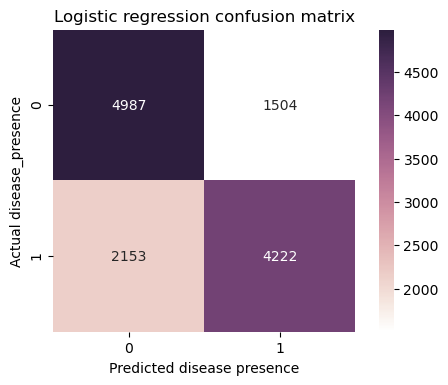

In [414]:
logistic_model_confusion = confusion_matrix(y_test, y_predict)

plt.figure(dpi=100)
cmap = sns.cubehelix_palette(light = 1 , as_cmap = True)
sns.heatmap(logistic_model_confusion, cmap=cmap,  annot=True, square=True, fmt ='g')

plt.xlabel('Predicted disease presence')
plt.ylabel('Actual disease_presence')
plt.title('Logistic regression confusion matrix');

In [415]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Precision: 0.7373,   Recall: 0.6623


#### Here I'm exploring the treshold and trying different treshold values 

In [416]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probab_predict[:,1])

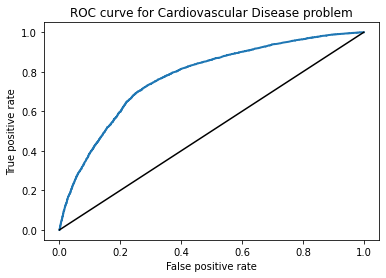

In [417]:
plt.plot(false_positive_rate, true_positive_rate,lw=2)
plt.plot([0,1],[0,1],c='black',ls='-')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Cardiovascular Disease problem');

In [418]:
print("ROC AUC score = ", roc_auc_score(y_test, y_probab_predict[:,1]))

ROC AUC score =  0.7750884996118306
